In [1]:
import matplotlib.pyplot as plt
import json

def plot(plt, ylabel):
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel(ylabel)
    plt.xlabel("day of April")
    plt.show()

In [2]:
scores = {}
DAYS = range(10, 23)
for day in DAYS:
    filename = 'json/04-{}.json'.format(day)
    scores[day] = json.load(open(filename))['leaderboard']

In [3]:
teams = []
mins = []
maxs = []
avgs = []
for key, vals in scores.items():
    teams.append(len(vals))
    mins.append(min(val['score'] for val in vals))
    maxs.append(max(val['score'] for val in vals))
    total = sum(val['score'] for val in vals)
    avgs.append(total / len(vals))

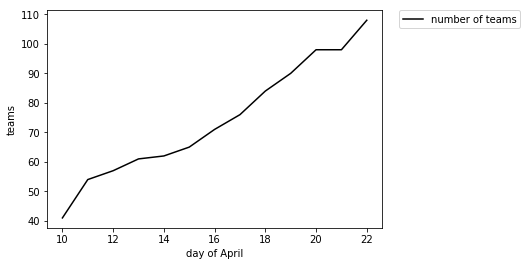

In [4]:
plt.plot(DAYS, teams, color='black', label="number of teams")
plot(plt, ylabel="teams")

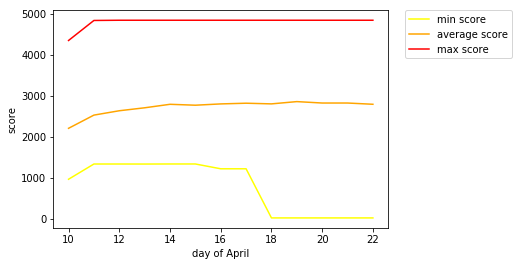

In [5]:
plt.plot(DAYS, mins, color='yellow', label="min score")
plt.plot(DAYS, avgs, color='orange', label="average score")
plt.plot(DAYS, maxs, color='red', label="max score")
plot(plt, ylabel="score")

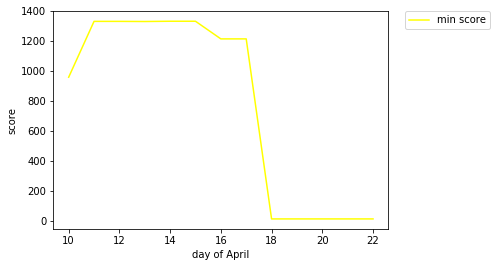

In [6]:
plt.plot(DAYS, mins, color='yellow', label="min score")
plot(plt, ylabel="score")

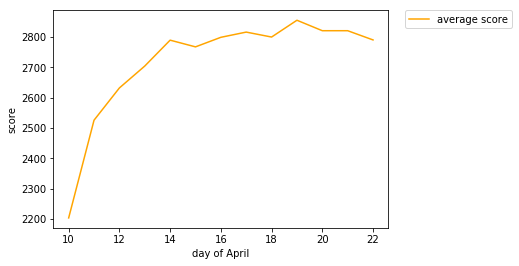

In [7]:
plt.plot(DAYS, avgs, color='orange', label="average score")
plot(plt, ylabel="score")

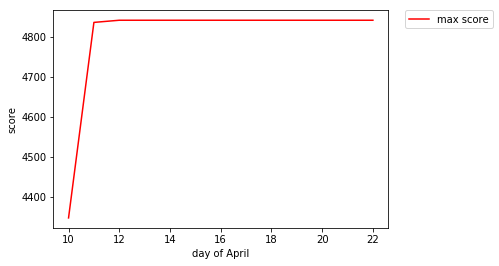

In [8]:
plt.plot(DAYS, maxs, color='red', label="max score")
plot(plt, ylabel="score")